## MIE1624: Assignment 1

In [1]:
#pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy.stats import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Load the original dataset
Salary_df = pd.read_csv('Kaggle_Salary.csv',low_memory = False)
print("Dataset shape:",Salary_df.shape)
Salary_df.head()

Dataset shape: (12497, 248)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


# 1.0 Data Cleaning and Preparation

**Initila interpretation of salary survey Dataset:**

This survey dataset contains about 34 questions. The majority of them is multi-choice questions. By checking the questions types, it is noted that from Q1 to Q8, each of them is only saved in a single column. However, from Q9 to Q34 (exclduing some quesitons, such as Q10 and Q11 and etc.),each question is stored in several columns with each selection or answer taking up one column. For the survey, each respondent is expected to select only one answer for each question (only fill the one column under one quetion). Thus, this could generate a considerable amount of NaNs because,for one multi-choice quetion, only one selection will be chosen,but the rest of them will be blank (NaNs). Thus, it is very important to clean the dataset before fitting the data to the models for further data analysis. 


**Data Cleaning and preparation procedures:**

1. Remove OTHER_Text and similiar feautres. (Reason: they do not have useful information)
2. Replace the missing values with mode or zero.
3. Drop the columns with very little information about the dataset (e.g., conlumns containing too many NaNs)


### Remove OTHER_TEXT features

In [4]:
# Clean and drop the Other_text columns
Col_Other =[]
for column in Salary_df.columns:
    if (column[-4:] == 'TEXT'): # scan for each column and append column name with last 4 character being TEXT
        Col_Other.append(column)

Salary_df = Salary_df.drop(columns=Col_Other)
print("Dataset shape:", Salary_df.shape)

Dataset shape: (12497, 220)


In [5]:
# Check the columns names to see if the Other_text column is removed
print(Salary_df.columns.tolist())

['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q10', 'Q11', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5', 'Q12_Part_6', 'Q12_Part_7', 'Q12_Part_8', 'Q12_Part_9', 'Q12_Part_10', 'Q12_Part_11', 'Q12_Part_12', 'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11', 'Q13_Part_12', 'Q14', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11', 'Q17_Part_12', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7'

### Deal with missing values

Total missing values is:  2176806


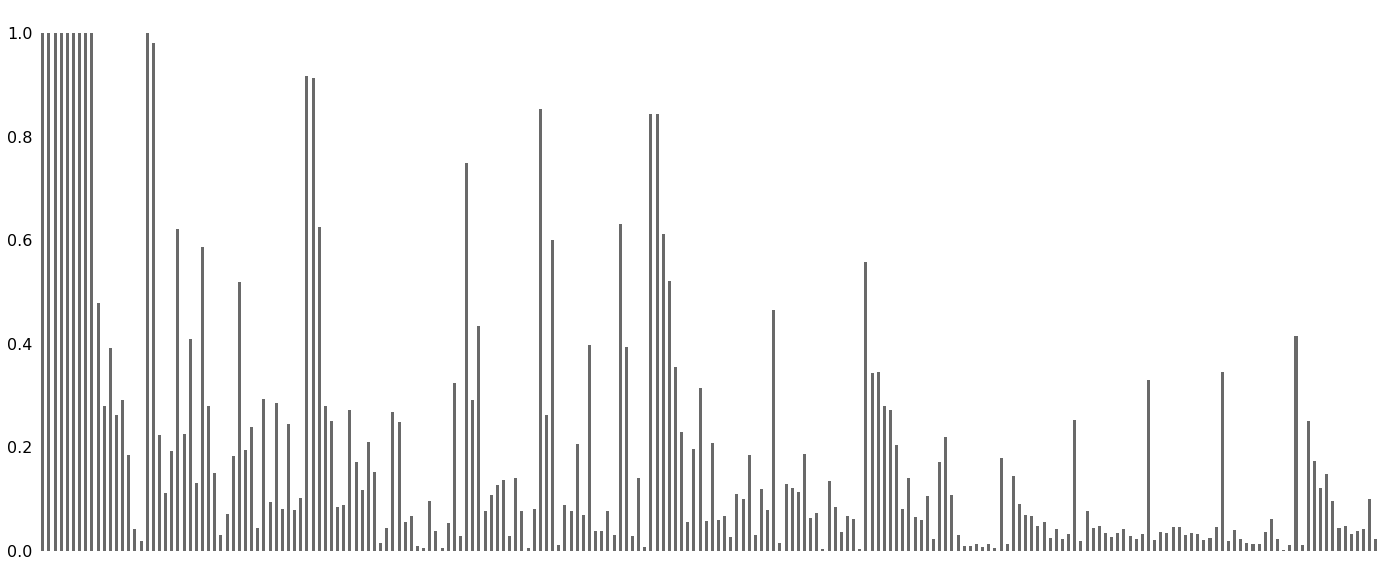

In [6]:
# Using missingno to visulaize the missing values
msno.bar(Salary_df.iloc[:,0:218])
print("Total missing values is: ",Salary_df.isnull().sum().sum())

As shown above, it seems that the number of null values tend to increase (decreasing trend in the above bar question) as the survey question number increases. This is to say, repondents may lose patience on answering the last couple of parts in the survey.

**Strategies to deal with missing values**


- For any columns for which less than 10% values are NaNs,just fill them with mode. (**Reason**: When a column has 10% data of NaNs, we can use mode (the most freqeunt terms in that column) to fill or predict the empty values)
- For any columns for which more than 80% values are NaNs, just drop the columns.(**Reason**: When a column has many nulls (e.g.,Nulls > 80%), it should be dropped as it contains very little information about the dataset. )
- For the rest of nulls, fill with 0. (**Reason**: It is noted that many questions (after Q8) are multi-choice reponses. The missing values for these questoins should be replaced with zeros for further analysis. Simply removing the columns containing certain percentage of nulls (not too many or too little NaNs) might reduce the dataset quality because these columns could be important to our future analysis. Thus, it would be better to not drop them but leave them until feature selection process, which will decide/filter the important feautre and which column should be removed. )



Total missing values is:  2174439


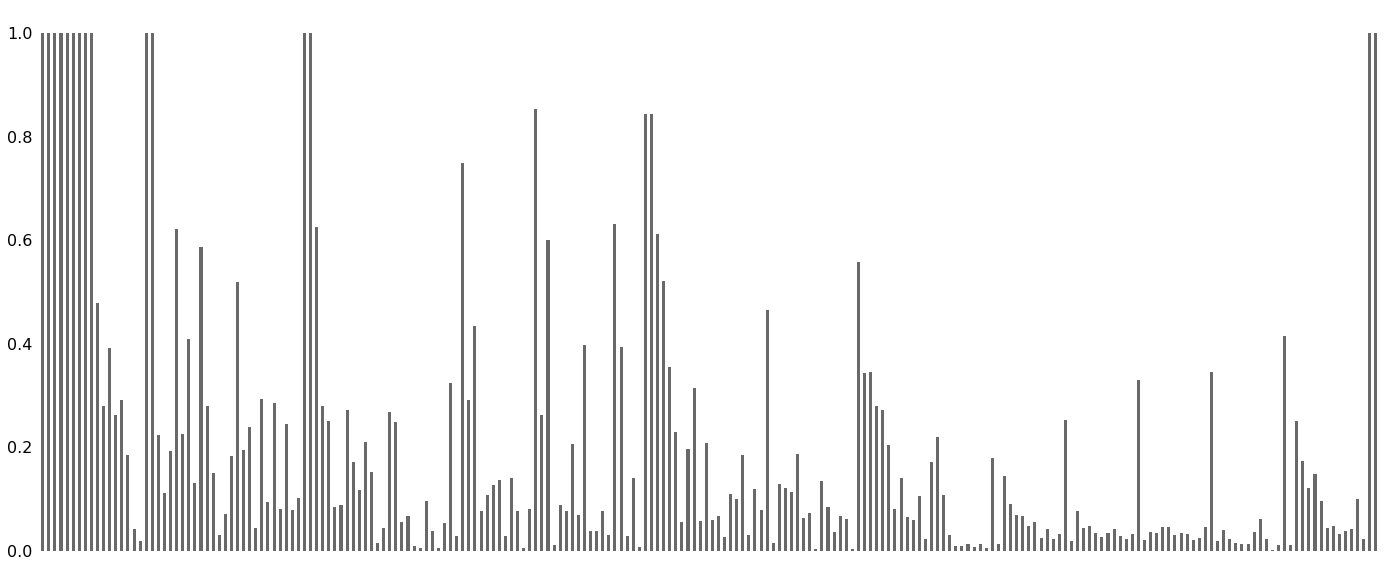

In [7]:
# Fill the columns containing less than 10% NaNs with mode
for col in Salary_df.columns:
    total_nan = Salary_df[col].isnull().sum()
    threshhold = int(0.1*Salary_df.shape[0]) 
    if (total_nan > 0) and (total_nan < threshhold):
        mode = Salary_df[col].mode()
        Salary_df[col] = Salary_df[col].fillna(mode[0])
msno.bar(Salary_df)
print("Total missing values is: ",Salary_df.isnull().sum().sum())

Total missing values is:  423174


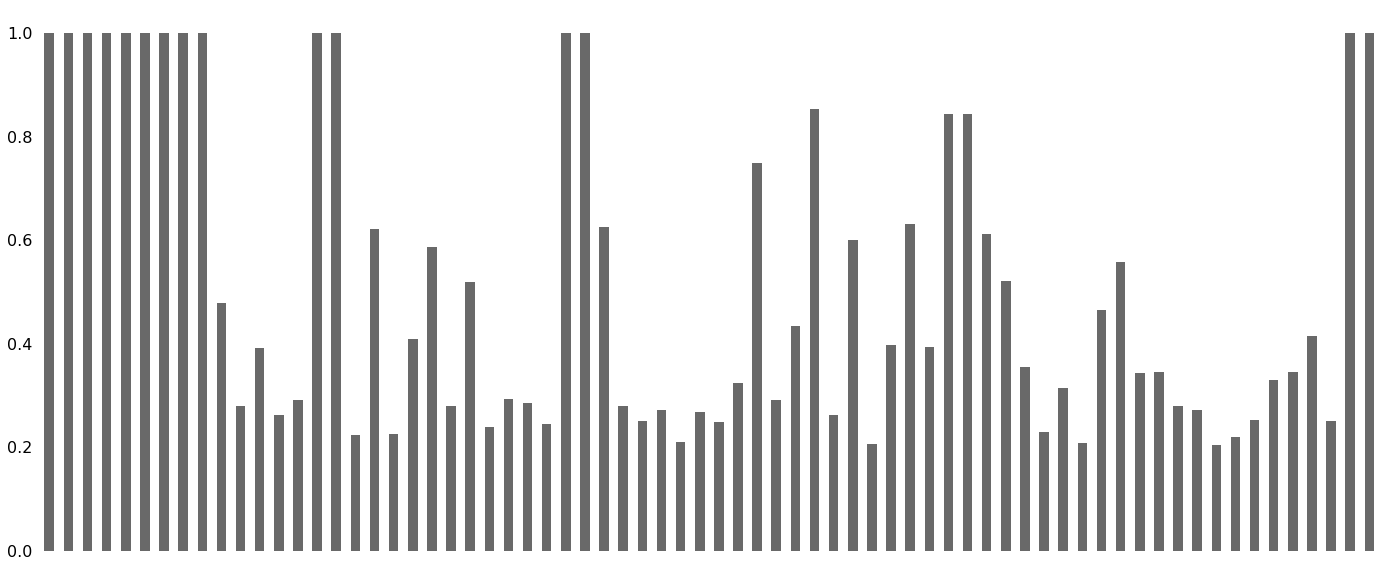

In [8]:
# Drop columns containing too many NaNs (NaNs > 80% )
for col in Salary_df.columns:
    total_nan = Salary_df[col].isnull().sum()
    threshhold = int(0.8*Salary_df.shape[0]) # set the threshhold to be 80% of data
    if (total_nan > threshhold):
        Salary_df.drop(columns =[col],inplace = True)
msno.bar(Salary_df)
print("Total missing values is: ",Salary_df.isnull().sum().sum())

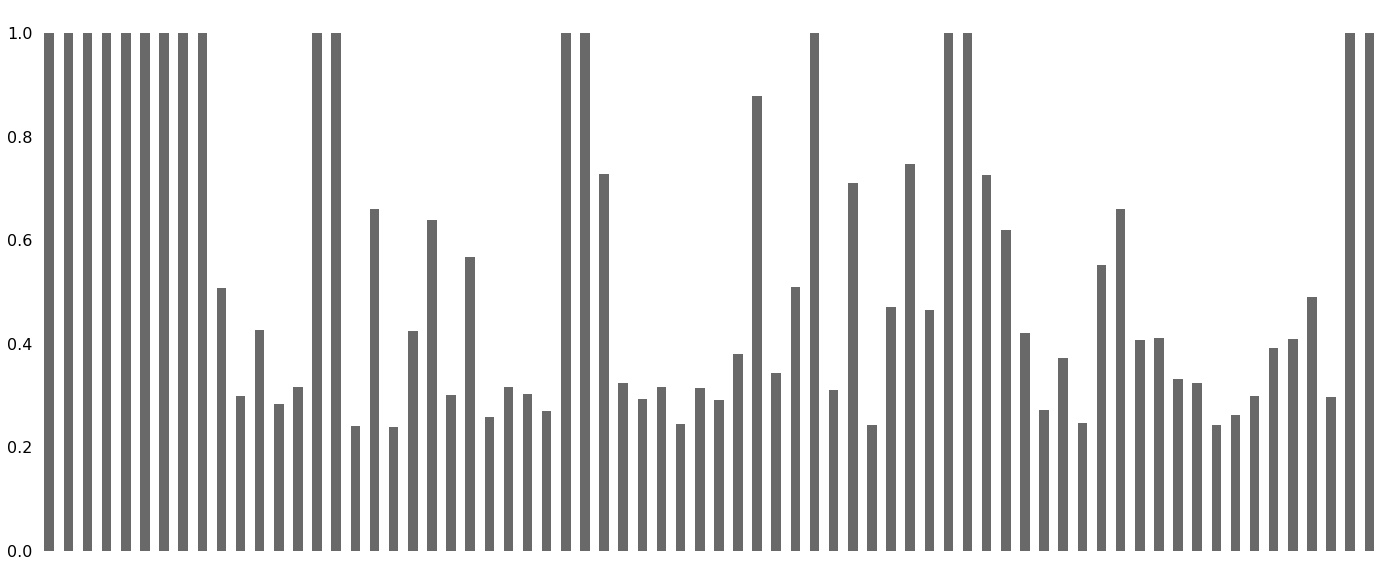

In [9]:
# Drop NaNs in ordinal data type such as Q22 and Q23
Salary_df.dropna(subset=['Q22','Q23'],inplace = True)
msno.bar(Salary_df)

In [10]:
Salary_df['Q23'].unique()

array(['1-2 years', '2-3 years', '< 1 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years'], dtype=object)

Total missing values is:  0


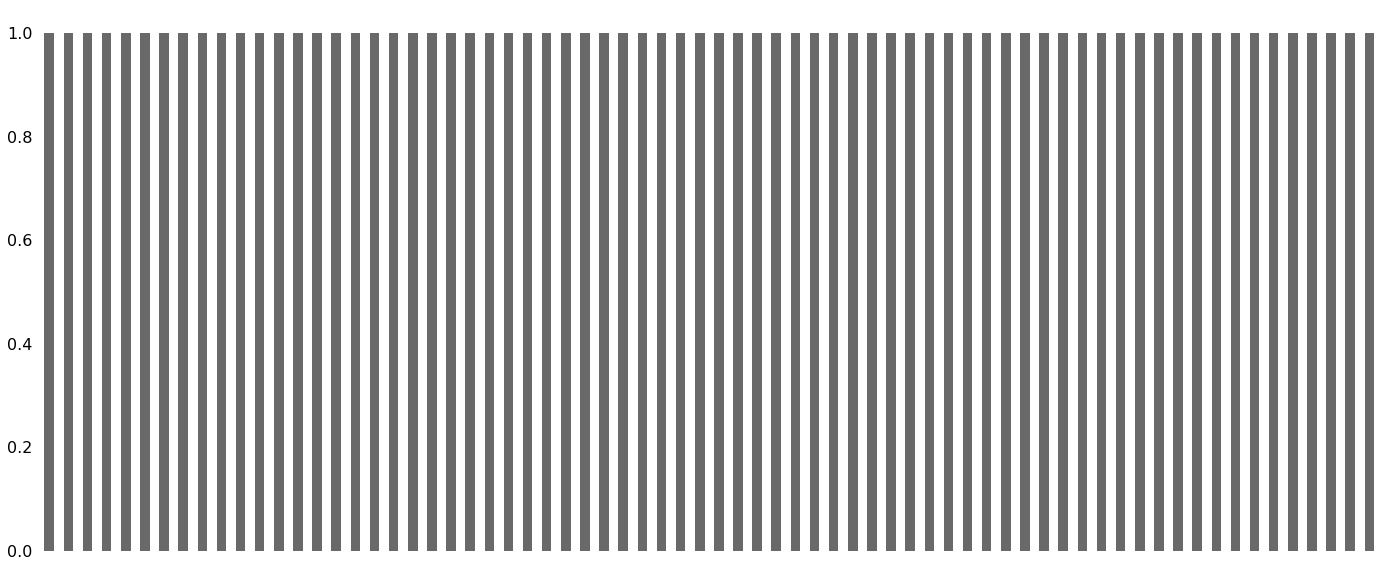

In [11]:
# Fill the rest NaNs with 0
Salary_df.fillna(0,inplace=True)
# Check the amount of NaNs in ths dataset
msno.bar(Salary_df)
print("Total missing values is: ",Salary_df.isnull().sum().sum())

In [12]:
# Check the shape of the cleaned dataset
Salary_df.shape

(10541, 70)

**One thing worth noting is that we have four types of values for Q2 (Gender column). Thus, it would be better to regroup them to three categories.**

In [13]:
Salary_df.Q2.value_counts().sort_values(ascending = False)

Male                       8936
Female                     1453
Prefer not to say           128
Prefer to self-describe      24
Name: Q2, dtype: int64

In [14]:
# Re-categorize the gender to Male, Female and other
# Note: the Map() function is used to substitue the value in a pandas series with another value
Salary_df['Q2'] = Salary_df['Q2'].map({'Male':'Male','Female':'Female','Prefer not to say': 'OTHER','Prefer to self-describe':'OTHER'})

In [15]:
# Double check the regrouped categories
Salary_df.Q2.value_counts().sort_values(ascending = False)

Male      8936
Female    1453
OTHER      152
Name: Q2, dtype: int64

In [16]:
# Make a copy of Salary_df
Salary_cleaned = Salary_df.copy()

In [17]:
print('Cleaned dataset shape: ',Salary_cleaned.shape)
Salary_cleaned.columns.tolist()

Cleaned dataset shape:  (10541, 70)


['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q10',
 'Q11',
 'Q12_Part_1',
 'Q12_Part_4',
 'Q12_Part_5',
 'Q12_Part_6',
 'Q12_Part_8',
 'Q12_Part_9',
 'Q13_Part_2',
 'Q13_Part_4',
 'Q13_Part_6',
 'Q13_Part_8',
 'Q13_Part_10',
 'Q14',
 'Q15',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_6',
 'Q16_Part_9',
 'Q17_Part_1',
 'Q17_Part_2',
 'Q17_Part_11',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q19',
 'Q20_Part_1',
 'Q20_Part_2',
 'Q20_Part_6',
 'Q20_Part_8',
 'Q21_Part_1',
 'Q21_Part_2',
 'Q22',
 'Q23',
 'Q24_Part_1',
 'Q24_Part_2',
 'Q24_Part_3',
 'Q24_Part_4',
 'Q24_Part_7',
 'Q24_Part_9',
 'Q25_Part_7',
 'Q28_Part_1',
 'Q28_Part_2',
 'Q28_Part_3',
 'Q28_Part_4',
 'Q28_Part_5',
 'Q28_Part_6',
 'Q29_Part_2',
 'Q30_Part_11',
 'Q31_Part_11',
 'Q32_Part_11',
 'Q33_Part_11',
 'Q34_Part_1',
 'Q10_Encoded',
 'Q10_buckets']

**Part 1 Solution: Why the values are missing?**
There are several reasons:

1. The majority of the questions are multi-choices (e.g., Q33) which only asks the respondent to choose one answer. Thus, it is impossible have the multiple-choose quetions fully filled with values.

2. The msno bar graph shows that the number of null values tend to increase (decreasing trend in the msno bar graph) as the survey question number increases. This is to say, repondents may lose patience on answering the last couple of parts in the survey.


3. It is noted that some quesitons could be private for respondents to provide the answer.







**Part 1 Solution: How your apprach might impact the overall anaysis?**


1. As mentioned earily, we only fill the columns with mode when they have a small amount of nulls (<10%). The potential problem could be that if the wrong prediction (wrong mode) is filled, this could case a high bias.
2. For the NaNs dropping stategy, if a column contains too many nulls, it should be dropped as it is not very informative. The threshhold is set to 80%. Doing so could help us exclude some useless features and reduce the dataset dimentions.
3. For the columns containing certain percetnage of nulls (e.g., not too many or too little NaNs), such as columns with greater than 10% but below 80% of values being nulls,they should be repalced with zeros. These columns may contain some important formation and should be kept until the feature selection process to help the model select the more relevant features.



### Categorical Data Encoding

For this section, two encoding methods will be implemented:
1. One Hot Encoding: This method will be used to encode the categorical data without inherent orders, such as gender (male or female). We would need to convert the categorical variables into integer data (e.g.,0 or 1) to fit in our mahcine learning algorithm. Also, we do not want apply any ordered encoding techniques to the data type without any kind of order or hierarchy,such as country and gender. This is beacuse model may derive correlation between the data and we could confuse the model when applying ordered encoding, such as ordinal encoder.
2. Ordinal encoding. This encoder will be used to ordinal data. For example, company size, yearly compenstation and age have the ordinal order. Thus, the ordinal encoding should be used for this type of data. 

In [18]:
# Check for the unique labels for each column
for col in Salary_cleaned.columns:
    print(col,': ',len(Salary_cleaned[col].unique()),'labels')

Time from Start to Finish (seconds) :  2869 labels
Q1 :  11 labels
Q2 :  3 labels
Q3 :  59 labels
Q4 :  7 labels
Q5 :  10 labels
Q6 :  5 labels
Q7 :  7 labels
Q8 :  6 labels
Q9_Part_1 :  2 labels
Q9_Part_2 :  2 labels
Q9_Part_3 :  2 labels
Q9_Part_4 :  2 labels
Q9_Part_5 :  2 labels
Q10 :  25 labels
Q11 :  6 labels
Q12_Part_1 :  2 labels
Q12_Part_4 :  2 labels
Q12_Part_5 :  2 labels
Q12_Part_6 :  2 labels
Q12_Part_8 :  2 labels
Q12_Part_9 :  2 labels
Q13_Part_2 :  2 labels
Q13_Part_4 :  2 labels
Q13_Part_6 :  2 labels
Q13_Part_8 :  2 labels
Q13_Part_10 :  2 labels
Q14 :  6 labels
Q15 :  6 labels
Q16_Part_1 :  2 labels
Q16_Part_2 :  2 labels
Q16_Part_3 :  2 labels
Q16_Part_6 :  2 labels
Q16_Part_9 :  2 labels
Q17_Part_1 :  2 labels
Q17_Part_2 :  2 labels
Q17_Part_11 :  2 labels
Q18_Part_1 :  2 labels
Q18_Part_2 :  2 labels
Q18_Part_3 :  2 labels
Q19 :  12 labels
Q20_Part_1 :  2 labels
Q20_Part_2 :  2 labels
Q20_Part_6 :  2 labels
Q20_Part_8 :  2 labels
Q21_Part_1 :  2 labels
Q21_Part_2 

In [19]:
# Apply ordinal encoding using map
Salary_encoded = Salary_cleaned.copy()
for col in Salary_encoded.columns:
    if col == 'Q1':
        encode = {'18-21':1,'22-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9, '60-69':10,'70+':11}
        Salary_encoded['Q1'] = Salary_encoded['Q1'].map(encode)
    elif col == 'Q6':
        encode = {'0-49 employees':1,'50-249 employees':2,'250-999 employees':3,'1000-9,999 employees':4,'> 10,000 employees':5}
        Salary_encoded['Q6'] = Salary_encoded['Q6'].map(encode)
    elif col == 'Q7':
        encode = {'0':1,'1-2':2,'3-4':3,'5-9':4,'10-14':5,'15-19':6,'20+':7}
        Salary_encoded['Q7'] = Salary_encoded['Q7'].map(encode)
    elif col == 'Q11':
        encode = {'$0 (USD)':1,'$1-$99':2,'$100-$999':3,'$1000-$9,999':4,'$10,000-$99,999':5,'> $100,000 ($USD)':6}
        Salary_encoded['Q11'] = Salary_encoded['Q11'].map(encode)
    elif col == 'Q15':
        encode = {'I have never written code':1,'< 1 years':2,'1-2 years':3,'3-5 years':4,'5-10 years':5,'10-20 years':6,'20+ years':7}
        Salary_encoded['Q15'] = Salary_encoded['Q15'].map(encode)
    elif col == 'Q22':
        encode = {'Never':1,'Once':2,'2-5 times':3,'6-24 times':4,'> 25 times':5}
        Salary_encoded['Q22'] = Salary_encoded['Q22'].map(encode)
    elif col =='Q23':
        encode = {'< 1 years':1,'1-2 years':2,'2-3 years':3,'3-4 years':4,'4-5 years':5,'5-10 years':6,'10-15 years':7,'20+ years':8}
        Salary_encoded['Q23'] = Salary_encoded['Q23'].map(encode)
    elif col == 'Q10': # pass encoded features
        pass
    elif col =='Q10_Encoded': # pass encoded features
        pass
    elif col =='Time from Start to Finish (seconds)': # this is not a useful feature thus no need to encode
        pass
    elif col =='Q10_buckets':# pass encoded features
        pass
    
    else:# this will only foucs on encoding the normal terms that are not ordinal
        OHenc = pd.get_dummies(Salary_encoded[col],prefix = col)
        # drop old columns add encoded coluns in one line
        Salary_encoded = pd.concat([Salary_encoded.drop(col,axis = 1),OHenc],axis = 1)
        

## 2.0 Exploratory Data Analysis

### a)

In [20]:
# Capture mean of hypthen seperated income in yearly compensation
Salary_cleaned['Q10']= Salary_cleaned['Q10'].str.replace(',','',).str.replace('$','').str.replace('>','').str.split('-',expand=True).astype(float).mean(axis=1)

In [21]:
Salary_cleaned['Q10']

0         34999.5
2        274999.5
3          4499.5
4         64999.5
5         12499.5
           ...   
12464      6249.5
12470     34999.5
12479     22499.5
12486     64999.5
12496     64999.5
Name: Q10, Length: 10541, dtype: float64

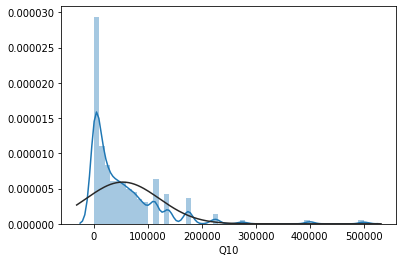

In [22]:
# Lets first plot the yearly compensation distribution with a histogram and maximum likelihood gaussian distribution fit:
Graph_1 = sns.distplot(Salary_cleaned['Q10'],fit =norm)


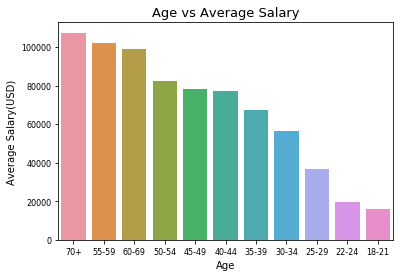

In [23]:
#Age vs Salary

Salary_Age = Salary_cleaned
Salary_Age = Salary_Age.groupby(by='Q1',as_index=False).agg({'Q10': pd.Series.mean})
Salary_Age = Salary_Age.sort_values(by = 'Q10',ascending = False)

Graph_2 = sns.barplot(x='Q1',y='Q10',data = Salary_Age)
Graph_2.axes.set_title('Age vs Average Salary',fontsize = 13)
Graph_2.axes.set_xlabel('Age',fontsize = 10)
Graph_2.axes.set_ylabel('Average Salary(USD)',fontsize=10)
Graph_2.tick_params(labelsize=8)

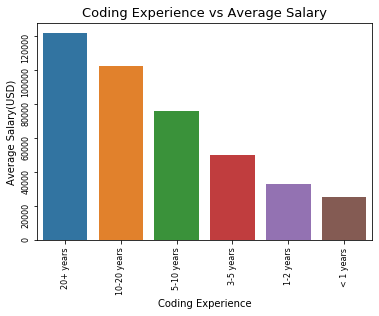

In [24]:
# Coding Experience vs Salary
Salary_exp = Salary_cleaned
Salary_exp = Salary_exp.groupby(by='Q15',as_index=False).agg({'Q10': pd.Series.mean})
Salary_exp = Salary_exp.sort_values(by = 'Q10',ascending = False)

Graph_3 = sns.barplot(x='Q15',y='Q10',data = Salary_exp)
Graph_3.axes.set_title('Coding Experience vs Average Salary',fontsize = 13)
Graph_3.axes.set_xlabel('Coding Experience',fontsize = 10)
Graph_3.axes.set_ylabel('Average Salary(USD)',fontsize=10)
Graph_3.tick_params(labelsize=8,rotation = 90)


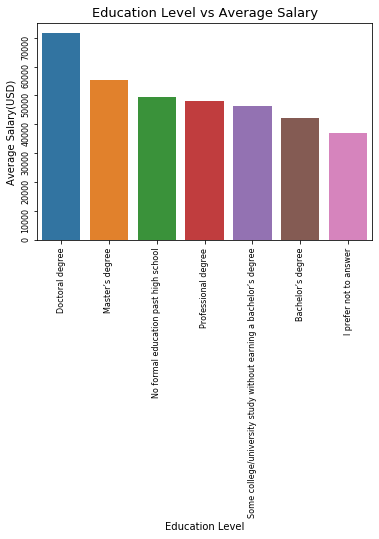

In [25]:
# Education vs Salary
Salary_education = Salary_cleaned
Salary_education = Salary_education.groupby(by='Q4',as_index=False).agg({'Q10': pd.Series.mean})
Salary_education = Salary_education.sort_values(by = 'Q10',ascending = False)

Graph_3 = sns.barplot(x='Q4',y='Q10',data = Salary_education)
Graph_3.axes.set_title('Education Level vs Average Salary',fontsize = 13)
Graph_3.axes.set_xlabel('Education Level',fontsize = 10)
Graph_3.axes.set_ylabel('Average Salary(USD)',fontsize=10)
Graph_3.tick_params(labelsize=8,rotation = 90)

**How could the trends be used to help with the task of predicting yearly compensation or understanding the data?**

From the above 3 figures, we can conclude that:

- The majority of the people's salaries are distirbtion below $100,000.
- It shows that higher age is assoicated with higher salary.
- People with higher dergree tends to make more money.

Thus, we may expect to see that old aged people with higher dergee may make more money in this industry.





### b) Visualize the order of feature importance

In [26]:
Salary_encoded = Salary_encoded.drop(['Q10','Q10_buckets','Time from Start to Finish (seconds)'],axis = 1)


In [27]:
Salary_encoded.shape

(10541, 215)

In [28]:
# Plot the heatmap for top features
k = 20 # set top features 
corr = Salary_encoded.corr()
cols = corr.nlargest(k, 'Q10_Encoded')['Q10_Encoded'].index
cm = np.corrcoef(Salary_encoded[cols].values.T)


Text(158.09374999999997, 0.5, 'Features')

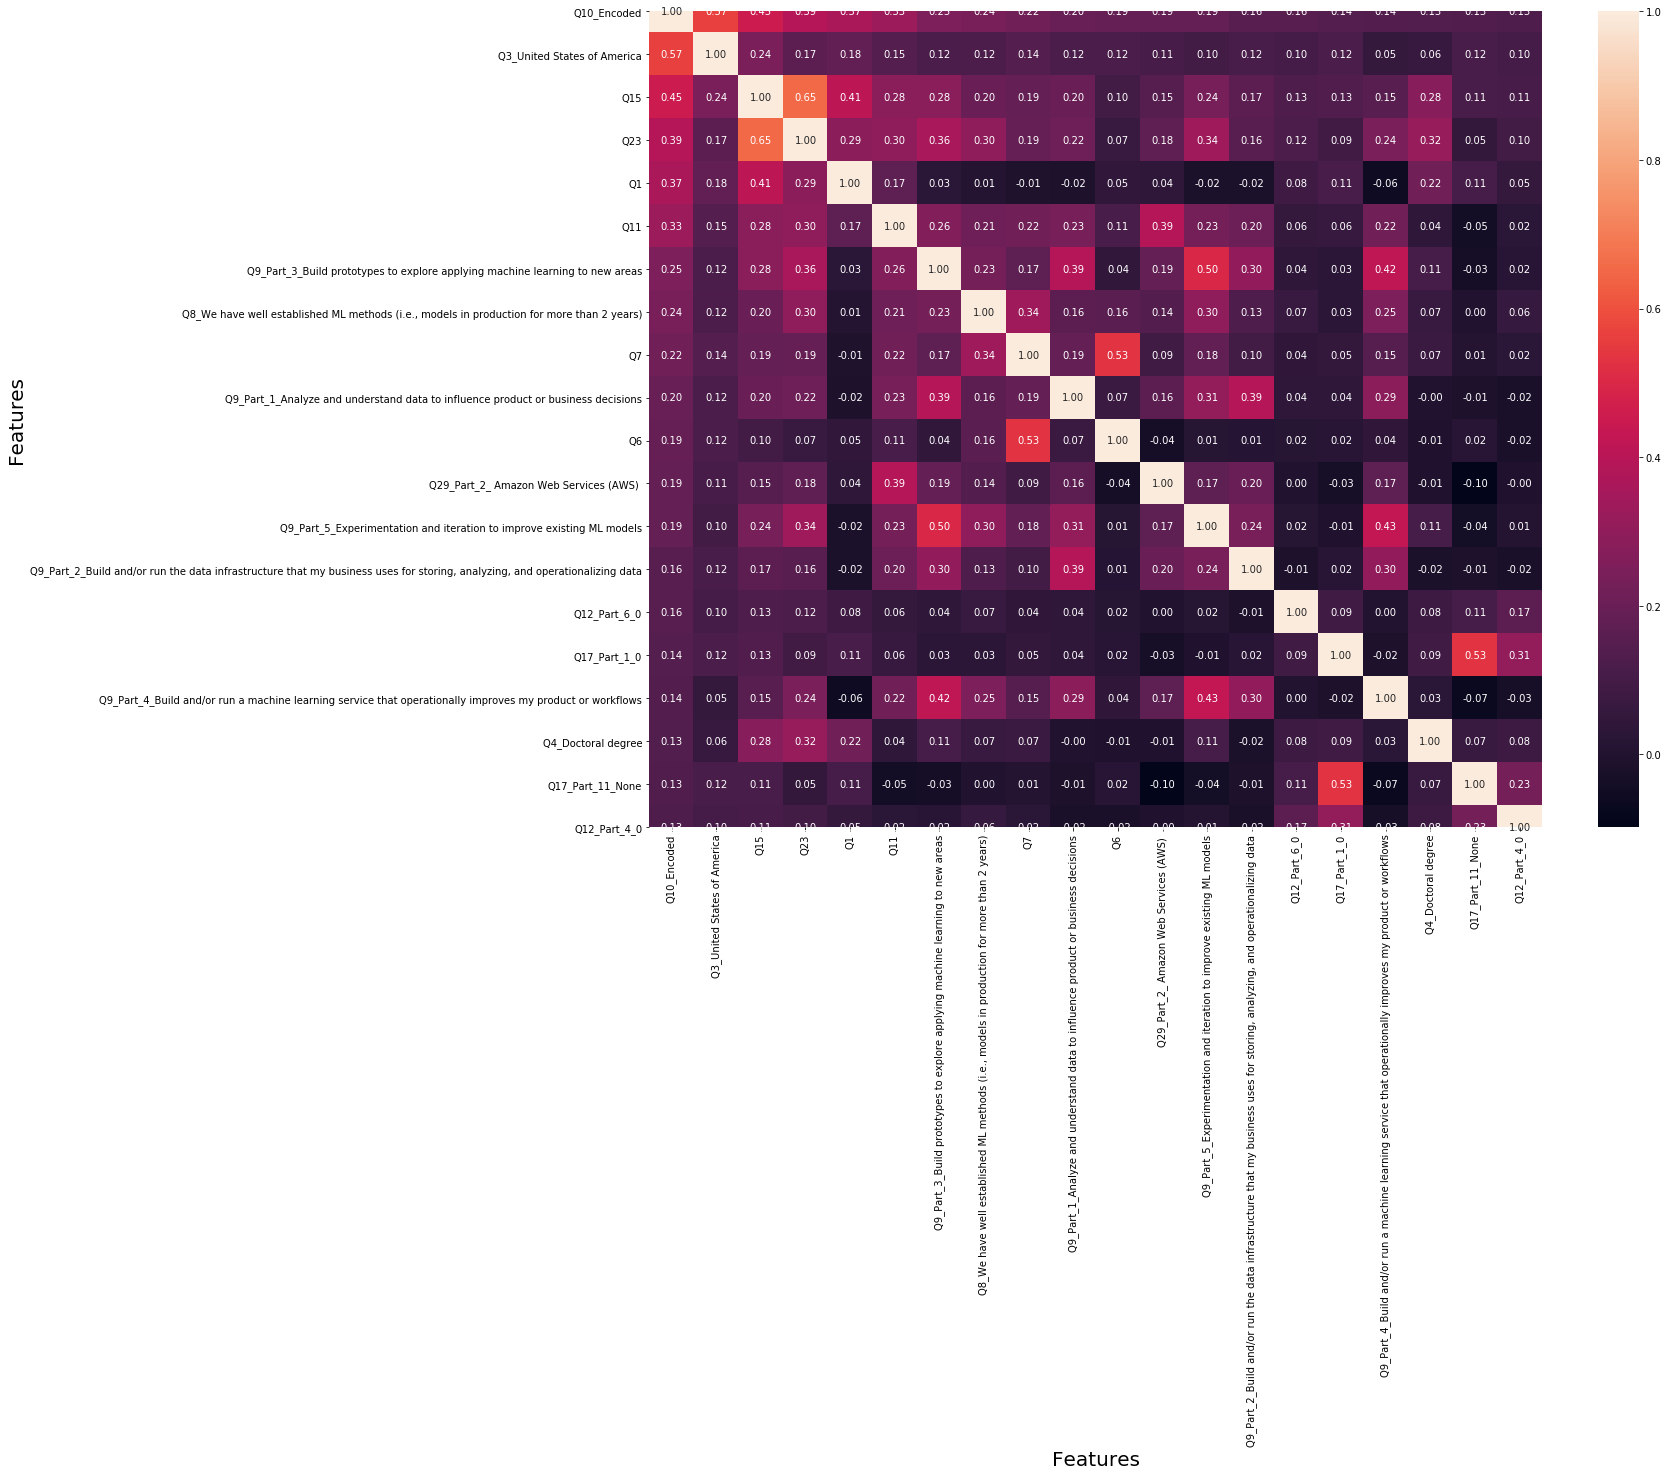

In [29]:
f, ax = plt.subplots(figsize=(20, 15))
#sns.set(font_scale = 10)
heatMap = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
heatMap.axes.set_xlabel('Features',fontsize = 20)
heatMap.axes.set_ylabel('Features',fontsize = 20)

As shown, the Q3_USA, Q15, Q23 and Q1 are very important features to predict the salary.

# 3. Feature Selection

**Explain how feature engineering is a useful tool in machine learning (ML)?**

Feature engineering basically have two goals which are: first, preparing the proper input dataset, compatible with the machine learning algorithm requirements, and, second, improving the performance of mahince learning models.

There are several tehcniques that could help us to engineer features in order to improve the ML performance.
- For example, we could create interactoin features by combining two or more features, which could be even more useful for the analysis.
- Also, we can comine sparse classes that have very few total observations. These features could be very problematic as it couuld lead to overfit for certain machine learning algorithms.
- When dealing with categorical features,we need to create dummy variables (a set of binary 0 or 1) that each represent a single class from a categorical feature.
- In addition, we may need to remove unused features that do not make sense to pass into our ML algorithms (e.g., other text descriptions).

**Feature Selections:**
There are several reasons that we do not input all the feautres to the ML

- Overfitting: In the case where we have more columns in the data than the number of rows, we will be able to fit our training data perfectly. However, this will not generalize to the new dataset, meaning we have learned absolutely nothing.
- Occam's Razor: Our ML model should be simple and explainable and we will lose explainability when having a lot of features.
- Garbage in and Garbage out: In the real life, we do not get well-organized and high quality data, but the non-informative data features. This means that poor-quality input will produce poor-quality output if we do not feature engineer the data properly.


Reference: https://elitedatascience.com/feature-engineering


**Feature Selection Methods:**
The most feature selection methdos can be divided into three major buckets:

- Filter based: We can specfiy some metric and based on that filter features (e.g., an example metric is corrlation/chi-square).
- Wrapper-based: we try to use a subet of features and train a model using them. Based on the inferences that we draw from the previous model, we can decide to add or remove features from the subset. This type of medthod is usually compitationally expensive (e.g., recursive feature elimination).
- Embedded: This method uses algotithms that have built-in feature selection methods. For instance, Lasso and Random Forest have their own feature selection methods.


Reference: https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2


**Random Forest (Embedded Method)**

For this dataset, the Random Forest (RF) will be used to select the important features.

This method use algorithms that have built-in feature selection methods. We can use RandomForest to select features based on feature importance. Bascially, we can calcualte feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

**How RF actually works?**

RF consists of 4 to 12 hundred decision tress with each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Bascially, each ree is a seqeune of ye-no questions based on a single/combination of features.At each node, the tree divides the dataset into 2 buckets with each of them hosting obervations that are more similar among themselves but different from ones in the other bucket.

Reference: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

**Why RF is used for this analysis?**

RF is under the category of embedded methods which have the benefits such as high accuracy, better generalization and very interpretable. For example, as not every tree sees all the features or all the observations, this would guarantee that the trees are de-correlated and therefore less prone to over-fitting.

In [30]:
# Define the target value
Y = Salary_encoded[['Q10_Encoded']] 
# Define the independent columns
X = Salary_encoded.drop(columns = ['Q10_Encoded'])

In [31]:
X_tree = X
Y_tree = Y
num_feats = 40

In [32]:
# Select the top features
RF_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
RF_selector.fit(X_tree, Y_tree)

RF_support = RF_selector.get_support()
RF_feature = X_tree.loc[:,RF_support].columns.tolist()
print ('The top feeatures (not ranked):',RF_feature)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


The top feeatures (not ranked): ['Q1', 'Q6', 'Q7', 'Q11', 'Q15', 'Q22', 'Q23', 'Q3_India', 'Q3_United States of America', 'Q4_Master’s degree', 'Q5_Data Scientist', 'Q12_Part_1_Twitter (data science influencers)', 'Q12_Part_4_0', 'Q12_Part_4_Kaggle (forums, blog, social media, etc)', 'Q12_Part_6_0', 'Q12_Part_6_YouTube (Cloud AI Adventures, Siraj Raval, etc)', 'Q12_Part_8_0', 'Q12_Part_8_Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)', 'Q12_Part_9_0', 'Q12_Part_9_Journal Publications (traditional publications, preprint journals, etc)', 'Q13_Part_2_0', 'Q13_Part_2_Coursera', 'Q13_Part_6_0', 'Q13_Part_6_Kaggle Courses (i.e. Kaggle Learn)', 'Q13_Part_8_0', 'Q13_Part_8_Udemy', 'Q13_Part_10_0', 'Q13_Part_10_University Courses (resulting in a university degree)', 'Q14_Local development environments (RStudio, JupyterLab, etc.)', 'Q16_Part_3_0', 'Q16_Part_3_ PyCharm ', 'Q16_Part_6_0', 'Q16_Part_6_ Visual Studio / Visual Studio Code ', 'Q18_Part_3_0', 'Q18_Part_3_SQL', 'Q

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Text(0.5, 1.0, 'Feature Importance - Random Forests')

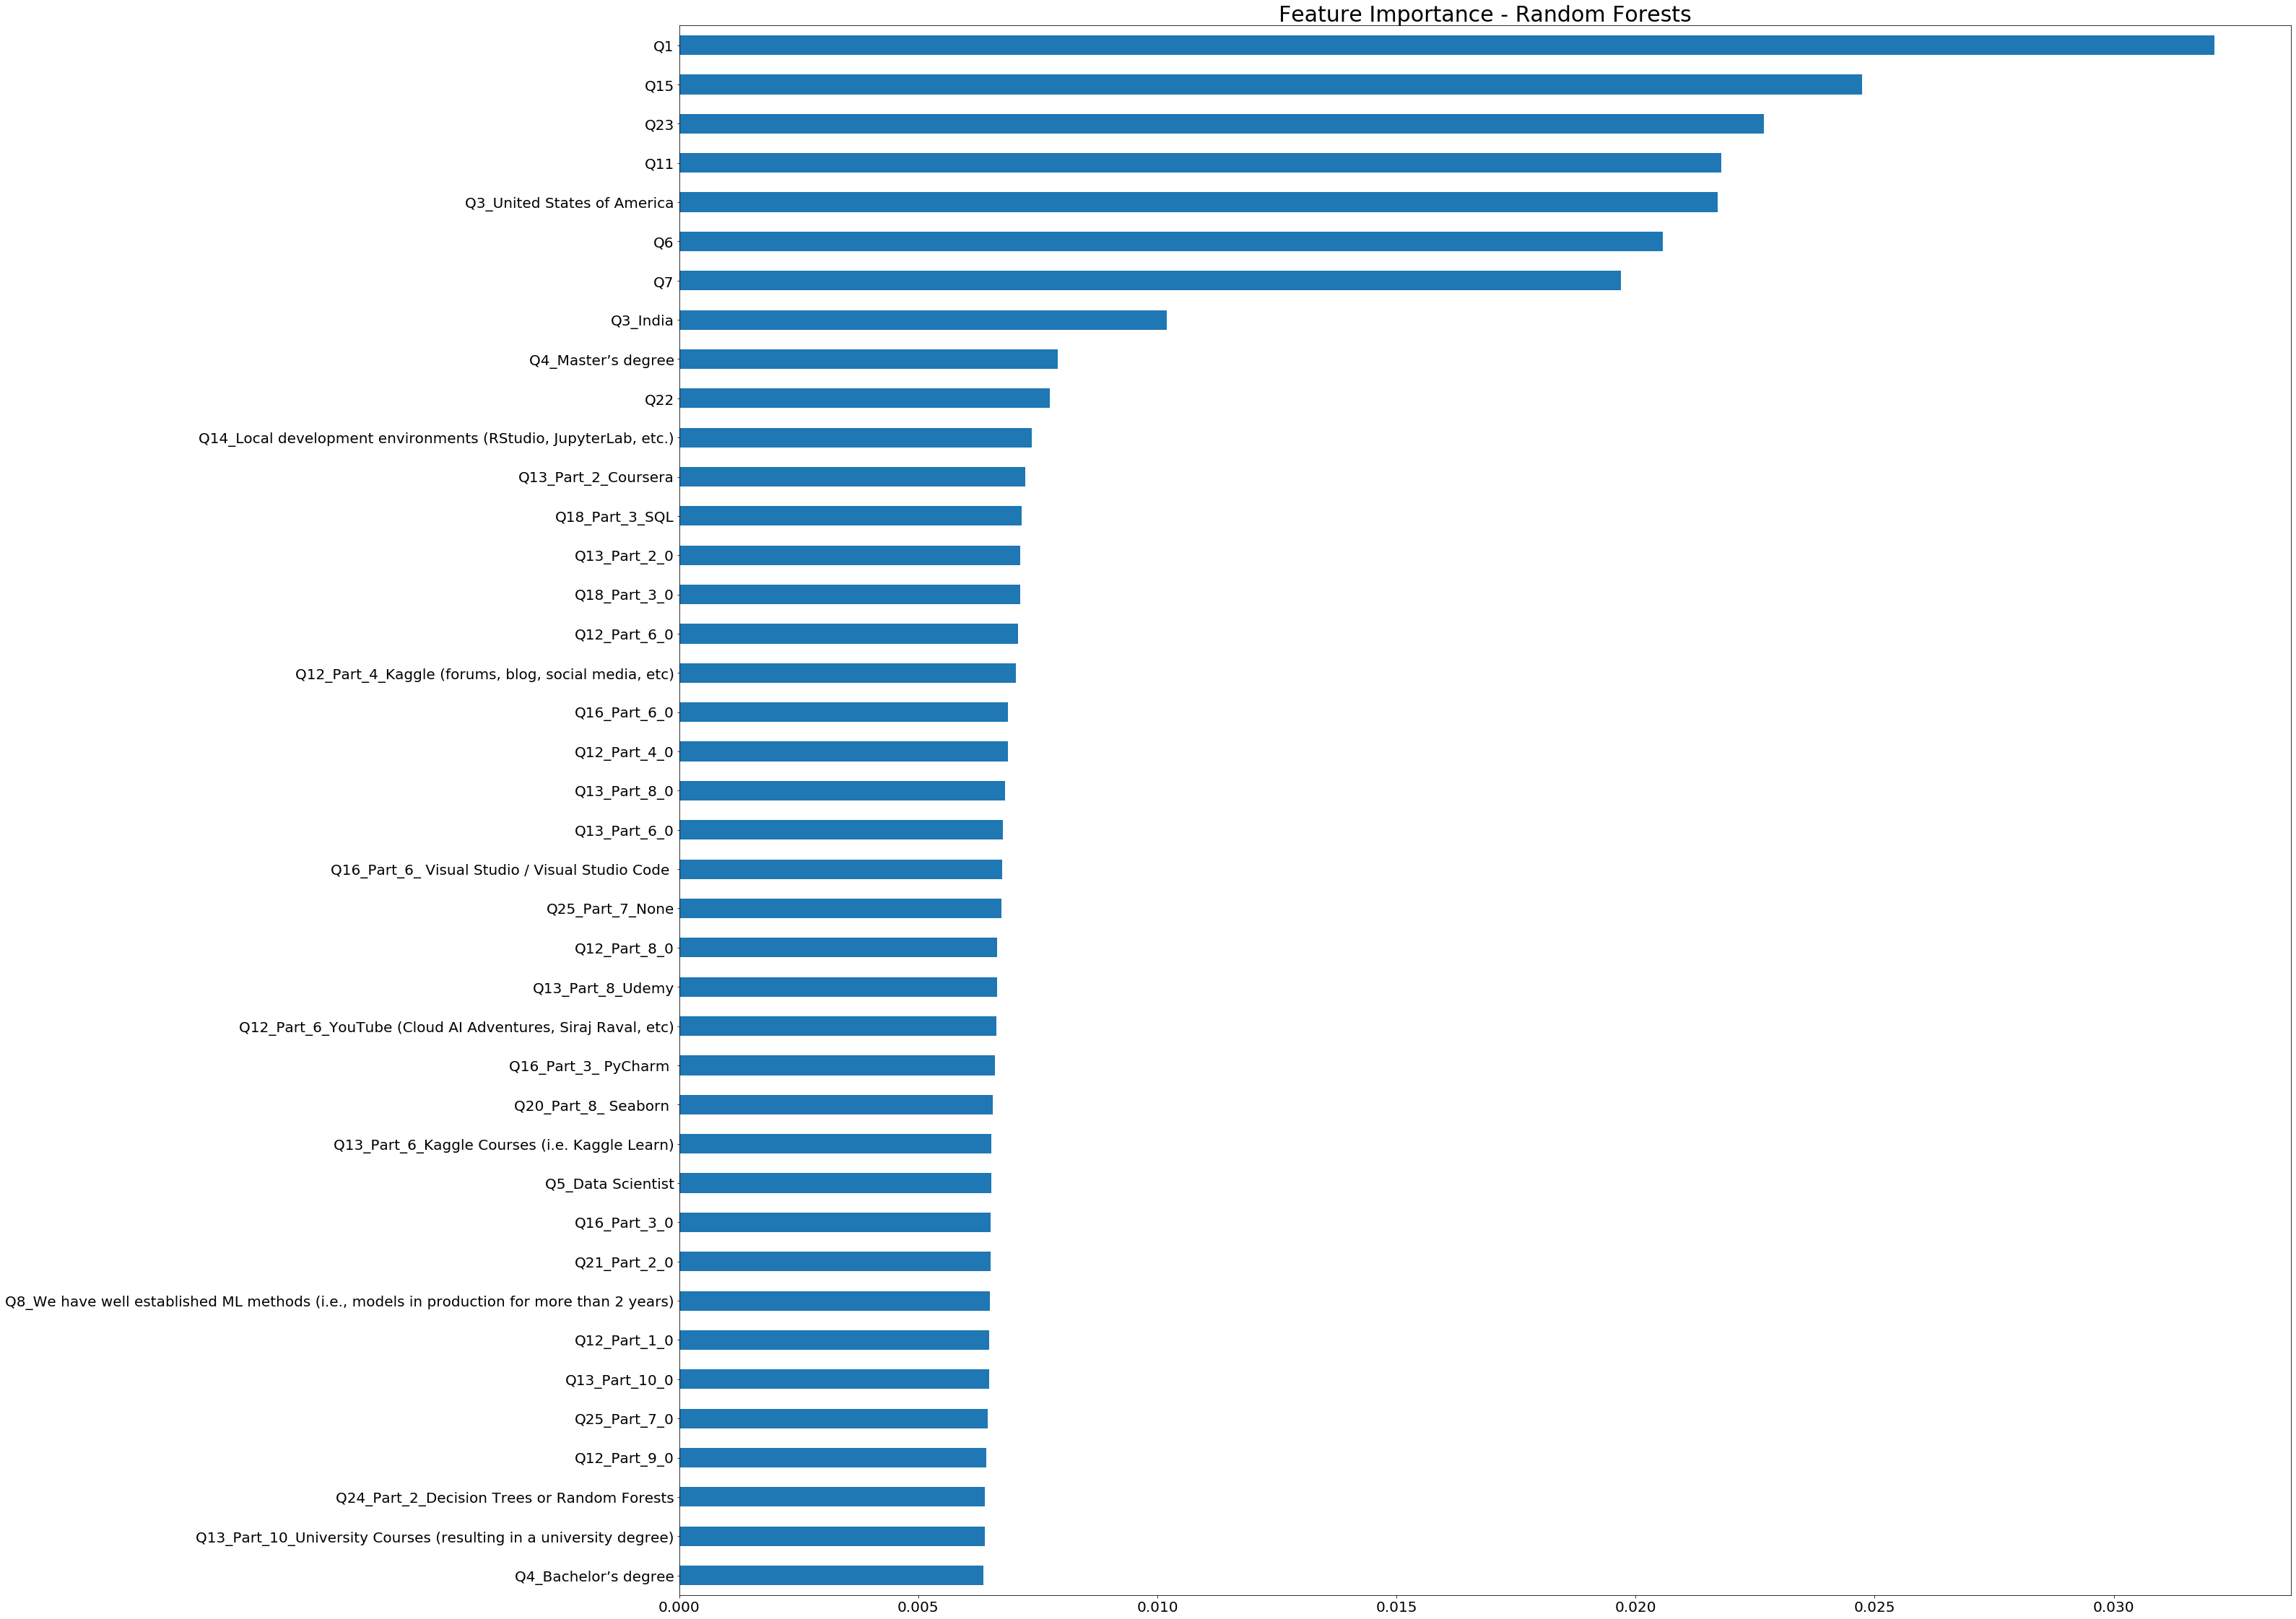

In [33]:
# visualize the feature importance

# ceate a random forest classifiers
RF_model = RandomForestClassifier(n_estimators=100,random_state=0)

#fit the model to the X_tree and Y_tree
RF_model.fit(X_tree,Y_tree)

feat_importance = pd.Series(RF_model.feature_importances_,index = X_tree.columns)

# plot the graph of sorted top feature importances
ax = feat_importance.nlargest(num_feats).sort_values(ascending=True).plot.barh(fontsize =20,figsize = (40,40))
plt.title('Feature Importance - Random Forests',size=30)


In [34]:
# Top 40 features
X_feature = X_tree[RF_feature]
X_feature.head()

,Q1,Q6,Q7,Q11,Q15,Q22,Q23,Q3_India,Q3_United States of America,Q4_Master’s degree,...,Q16_Part_3_ PyCharm,Q16_Part_6_0,Q16_Part_6_ Visual Studio / Visual Studio Code,Q18_Part_3_0,Q18_Part_3_SQL,Q20_Part_8_0,Q20_Part_8_ Seaborn,Q21_Part_2_0,Q21_Part_2_GPUs,Q25_Part_7_None
0,2,4,1,1,3,1,2,0,0,1,...,1,1,0,0,1,1,0,0,1,1
2,6,5,7,5,3,2,3,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,2,1,1,1,2,1,1,1,0,0,...,0,1,0,0,1,0,1,0,1,1
4,8,1,3,5,7,1,7,0,0,1,...,0,1,0,1,0,1,0,0,1,0
5,2,2,7,3,4,4,3,1,0,1,...,0,1,0,1,0,0,1,0,1,0


In [35]:
Y

,Q10_Encoded
0,3
2,14
3,0
4,6
5,1
...,...
12464,0
12470,3
12479,2
12486,6


Thus, the top 40 features are selected to fit in the model, which will be demonstrated in the next section

# 4.Model Implementation

For this section, two calssification models will be comapred: logistic regression and SVM will be compared. For logistic regression, different paramters will be used as a new logsitic model for comparision. In addition, this section aims to answer the following questions:

**How does your model accuracy compare across the folds?**

The accuracy doe not change too much for each fold. The accuracy value is around 0.32.

**What is average and variance of accuracy for folds?**

The average of 10 folds is 0.32 with a variance of 0.02

**Treating each value of hyperparameter as a new model, which model performed best?** **Give the reason based on bias-variance trade off.**

The bias-variance trafeoff often is needed, when we want to choose a model that both accurately captures the regulaities in the training data, but also generalizes well to unseen data.

For our example, the logistic has its paramter C to control the strength of regularization. When we have smaller C values (meaning sotrnger regularization), we might have a very simple model with low variance but such model could underfit the data (ignores relevant detials) and produce errors due to high bias. 

On the other hand,when we have increase C values (meaning week regularization), we may hae an overly complex model with very high vairace, but low bias.Such model could overfit the data and produce erros due to high variance.

Thus, we need to find tradeoff between bias and variance by tuning the hyperparamters in logistic regression. This will be further demonstrated in logistic hyperparamter tuning section with solid examples.



Reference: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Bias-variance-Tradeoff.php

In [36]:
# Split the origirnal dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_feature, Y, test_size=0.3)

In [37]:
print ('X_training has a shape:',X_train.shape)
print ('y_training has a shape:',y_train.shape)
print ('X_test has a shape:',X_test.shape)
print ('y_test has a shape:',y_test.shape)

X_training has a shape: (7378, 40)
y_training has a shape: (7378, 1)
X_test has a shape: (3163, 40)
y_test has a shape: (3163, 1)


### 1) Logistic Regression Model

**Logistic Regression:**

Advantages:

- It has convenient probability socre for observations.
- It is an efficient implemenation aviable across tools

Disadvantages:

- It does not perform well when feature space is too large.
- It does not handle large number of categorical features well

Reference:
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/

In [38]:
# Fit a logistic Regression model 
clf = LogisticRegression(C=1.0).fit(X_train,y_train)
y_train_predict = clf.predict(X_train)# predict y train value
y_test_predict = clf.predict(X_test)# predict y test value
scores = cross_val_score(clf,X_train,y_train,cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

In [39]:
# print the cross validation socres for 10 folds
k = 1
for i in scores:
    print('Scores for fold',k,':',i)
    k+=1
print("Average Cross Validation Score (Logistic): %0.2f(+/- %0.2f)"%(scores.mean(),scores.std()*2))


Scores for fold 1 : 0.29973118279569894
Scores for fold 2 : 0.3086253369272237
Scores for fold 3 : 0.3221024258760108
Scores for fold 4 : 0.32793522267206476
Scores for fold 5 : 0.30581867388362655
Scores for fold 6 : 0.32700135685210313
Scores for fold 7 : 0.33559782608695654
Scores for fold 8 : 0.3106267029972752
Scores for fold 9 : 0.32650273224043713
Scores for fold 10 : 0.34062927496580025
Average Cross Validation Score (Logistic): 0.32(+/- 0.03)


### Logistic Regression Hyperparameters Tuning 

The following parameters requred tuning:
1. **C parameter**: Inverse of regularization strength - smaller values of C specify stronger regularization.. This parameter controls the trade-off between regulating too much (our model could be too simple and underfit the data) and regulating too little (we would have more complex model but could be overfitting the data)
2. **Penalty parameter**: l1 or l2 which species the norm used in the penalization.

In [40]:
# Hyperparameter tunning
result_list = []
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Pen = ["l1","l2"]

for L in Pen:
    for C_value in C_list:
        clf = LogisticRegression(C=C_value,penalty = L).fit(X_train,y_train)
        y_train_predict = clf.predict(X_train)
        train_accuracy =cross_val_score(clf,X_train,y_train,cv=10).mean()
        result_list.append((L,C_value, train_accuracy))

result_df = pd.DataFrame(result_list, columns=["Penalty","C_value", "train_accuracy"])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

In [41]:
# print the training accuracy for two types of penalties associted with their C values
result_df.sort_values(by = ['train_accuracy'],ascending = False)

,Penalty,C_value,train_accuracy
2,l1,0.100,0.322874
9,l2,0.100,0.321527
3,l1,1.000,0.320589
10,l2,1.000,0.320457
6,l1,1000.000,0.320323
4,l1,10.000,0.320187
13,l2,1000.000,0.320186
5,l1,100.000,0.320050
11,l2,10.000,0.320050
12,l2,100.000,0.320050


#### Choose the best model - Logistic Regression

As shwon above,each row could be treated as a new logistic model and the penal type and C values are computed to find the bedt tradeoff between the bias and variance. 

For example, when we strengthen the regularization by lowering C (e.g., Penalty = l1, C = 0.001, accuracy = 0.296160), we would have the lowest accuracy, which means we may put too much regulaization on the model (high variance but low bias). 

On the other hand, when we increase the C value, the accruacy begins to increase (e.g., penalty = l1, C = 100, accuracy = 0.32, low variance and high bias).

Therefore, we try to balance variance and bias and able to find the optimal paramater. It is shown that the model with penalty of l1 and C value of 0.1 has the best performance (the highest accuracy). Thus, it should be selected as the optimal model at this point.

**Optimized Logistic model (Penalty = l1 and c = 0.1):**

In [42]:
# Predict the Y_train with the optimized model and calcualte the probablity of belonging to each salary bucket
clf_OPT = LogisticRegression(C=0.1,penalty ='l1').fit(X_train,y_train)
y_train_predict_2 = clf_OPT.predict(X_train)
# output of the algorithm
y_pred_proba = clf_OPT.predict_proba(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
# View the probability of belonging to each class for the first 10 rows
pd.DataFrame(y_pred_proba).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.402574,0.156225,0.090369,0.063998,0.055148,0.049366,0.042448,0.044615,0.019809,0.019572,0.027987,0.015208,0.007103,0.002555,0.003024
1,0.012051,0.008468,0.014844,0.011386,0.022147,0.037278,0.037586,0.059360,0.044838,0.056568,0.194011,0.183573,0.204254,0.052169,0.061467
2,0.026875,0.013504,0.014643,0.020355,0.030979,0.033121,0.038488,0.051849,0.052447,0.047864,0.151343,0.166870,0.253430,0.064536,0.033694
3,0.503954,0.109641,0.115029,0.041558,0.039097,0.027700,0.014706,0.022507,0.014848,0.011499,0.037188,0.019564,0.012574,0.009850,0.020283
4,0.157838,0.179387,0.121547,0.115077,0.096197,0.064003,0.055324,0.045537,0.031371,0.025297,0.052547,0.027679,0.012813,0.006967,0.008415
5,0.295131,0.093999,0.084984,0.064631,0.119546,0.061407,0.052246,0.044358,0.041847,0.025945,0.041357,0.030736,0.015297,0.010616,0.017900
6,0.015991,0.018133,0.023020,0.025933,0.027044,0.058326,0.060404,0.075339,0.074141,0.073956,0.178067,0.134473,0.185884,0.035131,0.014159
7,0.059257,0.092245,0.091983,0.113428,0.087407,0.096454,0.080533,0.066621,0.040689,0.078304,0.093897,0.040143,0.028472,0.012509,0.018058
8,0.147880,0.147668,0.159699,0.090412,0.051021,0.055387,0.032013,0.041469,0.020147,0.039669,0.087102,0.038557,0.045255,0.017529,0.026191
9,0.235955,0.076757,0.084695,0.091180,0.084962,0.073364,0.080819,0.064606,0.043450,0.037345,0.068037,0.024963,0.022878,0.005967,0.005024


Please note that each ecoding number represents a certain range of salary. For example, 0 means the salary range of $ 0 - $ 9,999, while 14 indicates the salary bucket of more than $250,000

As shown above,the model (logistic regression) calcualted the probabirlity matrix (number of samples x number of classes). The index 0 refers to the probability that the data belong to class zero.
Index 14 refers to the probability that the data belong to class 14 (salary more than $250,000)

### 2) SVM (Support Vector Machine) Model

**SVM:** This algorithm creates a hyperplane or line (decision bounday) to seperate data into classes. Also, it uses kernel trick to seek for the best seperator or names as decision boundary. It is a very powerful tool to learn complex non-linear functions.

Advantages:

- It can handle large feature space and non-linear feature interactions.
- The kernel Trick is a very powerful tool for SVM as it can solve complex problem.
- The risk of overfitting is less in SVM.


Disadvantages:

- SVM may not perform well when the data set has moire noise (e.g., target calsses are overlapping)
- The way that suppport vector classifier works is locating the data points above and below the calssifying hyperplane so there is no probabilistic explanation for the classification.
- It could e very difficult to find the appropriate kernel.

Reference: 
1. https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16
2. https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107


In [44]:
from sklearn import svm
svr_model = svm.SVR().fit(X_train, y_train)
scores_svr = cross_val_score(svr_model, X_train, y_train, cv=10) # 10 k folds cross validation


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

In [45]:
# View the vross validation score
print("Cross Validation Score (SVR): %0.4f(+/- %0.2f)"%(scores_svr.mean(),scores_svr.std()*2))

Cross Validation Score (SVR): 0.5336(+/- 0.04)


**Therefore:** the SVM tends to perfrom better when calculating the cross validation score. The next section will tune these two models.

# 5. Model Tuning

### Logistic Regression - Grid Search Tuning

Grid Search is bascially the process of performing hyper parameter tuning to determine the optimal values ofr a model.In this section, the GridSearchCv from sklearn library is used to find the optimum hyper parameters for the logistic model.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets

In [47]:
#Logistic = linear_model.LogisticRegression()
Logistic = LogisticRegression()
Pen = ['l1', 'l2']# Build a regularization penalty space list 
C_values = np.logspace(-4, 4, 10) # build and store C hyperparameters in log space list
hyperparameters = dict(C = C_values, penalty = Pen) # Create hyperparameter options
clf = GridSearchCV(Logistic, hyperparameters, cv = 10, verbose=0, scoring = 'accuracy')# build a grid search using 5-fold cross validation with the metric of accuracy
Log_model = clf.fit(X_train, y_train) # Fit grid search


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

In [48]:
# Print best hyperparameters
print('Best Penalty:', Log_model.best_estimator_.get_params()['penalty'])
print('Best C:', Log_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.046415888336127774


In [49]:
# Fill the logistic regression with best parameters
log_best = LogisticRegression(C = Log_model.best_estimator_.get_params()['C'],penalty = Log_model.best_estimator_.get_params()['penalty']).fit(X_train, y_train)
# Calculate the 10 k folds cross valdiation score
scores_log = cross_val_score(log_best, X_train, y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

In [50]:
# predict the y value
y_pred = Log_model.predict(X_train).reshape(y_train.shape[0],1)

In [51]:
print('Best_estimator_.score (Logistic) %0.2f'% Log_model.best_estimator_.score(X_train,y_train))
print('Cross Validation Score (Logistic) %0.2f'% scores_log.mean())
print('R2 Score (Logistic) : %0.2f'% r2_score(y_train, y_pred))
print('Train Accuracy Score : %0.2f' % accuracy_score(np.array(y_train),y_pred))
#print('MSE Score (Logistic) : %0.2f'% mean_squared_error(y_train, y_pred))
#print('f1 Score (Logistic) : %0.2f'% f1_score(y_train, y_pred, average='macro'))
#print('Precision Score (Logistic) : %0.2f'% precision_score(y_train, y_pred, average ='macro'))

Best_estimator_.score (Logistic) 0.33
Cross Validation Score (Logistic) 0.32
R2 Score (Logistic) : -0.00
Train Accuracy Score : 0.33


AS compared with the logistic model in the previous section, the grid research method have a very simiar cross validation score. Both of them are around 0.32. Lets try tuning another model to see if we can have some improvement.

### SVM - Grid Search Tuning

Parameters:
- C parameter: regularization parameter that controals the trade-off between the penalty ad width of the margin.
- Kernel: It specifies the kernel type to be used in the algorithm. For example, it could be linear, poly,rbf,sigmoid and etc. The defualt is rbf.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svr = svm.SVR().fit(X_train, y_train)
Parameters= {'kernel':['rbf','linear'],'C': [1,5]}
SVR= GridSearchCV(svr, Parameters, cv=10)
SVR_model = SVR.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [53]:
# predict the y value
y_pred_svr = SVR_model.predict(X_train).reshape(y_train.shape[0],1)

In [54]:
# find the best parameters
print('Best Kernel :', SVR_model.best_estimator_.get_params()['kernel'])
print('Best C:', SVR_model.best_estimator_.get_params()['C'])

Best Kernel : rbf
Best C: 1


In [55]:
# fit the best hyperparameter to the svr model
svr_best = svm.SVR(C = 1, kernel = 'rbf').fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
# Calculate the 10 k folds cross valdiation score
scores_SVR = cross_val_score(svr_best, X_train, y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

In [57]:
print("Cross Validation Accuracy (SVR): %0.4f (+/- %0.2f)" % (scores_SVR.mean(), scores.std() * 2))
print('Best_estimator_.score (SVR) : %0.2f' % SVR_model.best_estimator_.score(X_train,y_train))
print('R2 Score (SVR) : %0.2f'% r2_score(y_train, y_pred_svr))

Cross Validation Accuracy (SVR): 0.5336 (+/- 0.03)
Best_estimator_.score (SVR) : 0.57
R2 Score (SVR) : 0.57


As shown above, when we compare cross validatoin accuracy and best_estimator_.score, SVR models performs much better than logistic regression on training set. The next section will demonstrate how they perform on the testing dataset.

# 6. Testing & Discussion

For this section, the following quesitons will be answered
1. Use the optimal model to make classifications on the test set. 
2. How does the model perform on the test set vs. the training set? 
3. The overall fit of the model, how to increase the accuracy (test, training)? 
4. Is it overfitting or underfitting? Why? Plot the distribution.

**1. Use the optimal model to make classifications on the test set.**

### Logistic Regression

In [58]:
# Predict the y value on test dataset with the best logtistic model tuned on step 5
y_pred_test = log_best.predict(X_test).reshape(y_test.shape[0],1)

In [59]:
scores_log_test = cross_val_score(log_best, X_test, y_test, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataCo

In [60]:
print('Test Accuracy Score : %0.2f' % accuracy_score(np.array(y_test),y_pred_test))
print('Cross Validation Score (Logistic) %0.2f'% scores_log_test.mean())
print('Best_estimator_.score (Logistic) %0.2f'% Log_model.best_estimator_.score(X_test,y_test))


Test Accuracy Score : 0.32
Cross Validation Score (Logistic) 0.32
Best_estimator_.score (Logistic) 0.32


### SVR

In [61]:
y_pred_test_SVR = svr_best.predict(X_test).reshape(y_test.shape[0],1)

In [62]:
scores_svr_test = cross_val_score(svr_best, X_test, y_test, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

In [63]:
#print('Test Accuracy Score : %0.2f' % accuracy_score(np.array(y_test),y_pred_test_SVR))
print('Cross Validation Score (SVR) %0.2f'% scores_svr_test.mean())
print('Best_estimator_.score (SVR) %0.2f'% SVR_model.best_estimator_.score(X_test,y_test))
print('R2 Score (SVR) : %0.2f'% r2_score(y_test, y_pred_test_SVR))
#print('MSE Score (SVR) : %0.2f'% mean_squared_error(y_test, y_pred_test_SVR))


Cross Validation Score (SVR) 0.52
Best_estimator_.score (SVR) 0.54
R2 Score (SVR) : 0.54


**2. How does the model perform on the test set vs. the training set?**

For both models, the model performs slightly better on the training dataset. The metrics have a higher value (e.g., higher cross validation score) on training set.

**3. The overall fit of the model, how to increase the accuracy (test, training)?Is it overfitting or underfitting? Why? Plot the distribution.**

Overall, the SVM tends to perform better logsitic regression after tuning the paramters. One way to increase the accuracy of the model would be to rebuild a grid serach by including more parameters or more values for each parameter. In addition, we may need to do a better data cleaning and more reasonable feature selections before fitting the data to the machine algorithm. For example, we may miss some important features or include too many features.

The model both logstic and SVR are slightly overfiting the data since the test accuracy score is lower than the training accuracy score, but the difference is very small.

### Distribution Plot - Logistic Regression

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:225: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


<Figure size 1440x1440 with 0 Axes>

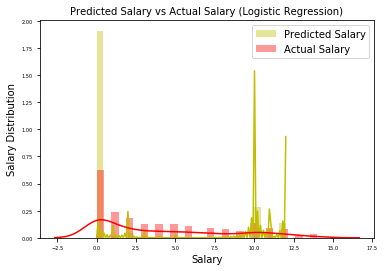

<Figure size 1440x1440 with 0 Axes>

In [64]:
# plot the distribution for the optimzied logistic regression
sns.distplot(y_pred_test, bins=30,  color="y",label='Predicted Salary')
ax=sns.distplot(np.array(y_test), bins=30, color="R",label='Actual Salary')
ax.axes.set_title('Predicted Salary vs Actual Salary (Logistic Regression)',fontsize=10);
ax.set_xlabel('Salary',fontsize=10);
ax.set_ylabel('Salary Distribution',fontsize=10);

ax.tick_params(labelsize=5)
plt.legend(fontsize = 10)
plt.figure(figsize=(20,20))


### Distribution plot for SVM

In [65]:
Y_pred_svr= svr.predict(X_test)

<Figure size 1440x1440 with 0 Axes>

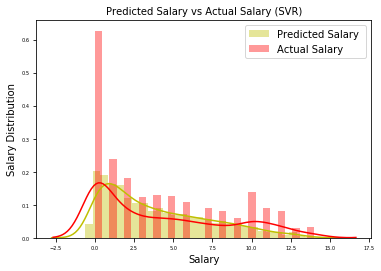

<Figure size 1440x1440 with 0 Axes>

In [66]:
# plot the distribution
sns.distplot(y_pred_test_SVR, bins=30,  color="y",label='Predicted Salary ')
ax=sns.distplot(np.array(y_test), bins=30, color="R",label='Actual Salary')

ax.axes.set_title('Predicted Salary vs Actual Salary (SVR)',fontsize = 10)
ax.set_xlabel('Salary',fontsize = 10)
ax.set_ylabel('Salary Distribution',fontsize = 10)
ax.tick_params(labelsize=5)
plt.legend(fontsize = 10)
plt.figure(figsize=(20,20))

Overall, we could see that SVR model has a bell curve shape that is more simialr to the actual salary distirbution. SVR simulated result tends to follow the actual distribution much better than the logistic regression.